# Generators

A generator uses what is called Lazy evaluation read more [here](https://en.wikipedia.org/wiki/Lazy_evaluation). 

Lazy Evaluation is a evaluation only when needed operation. Meaning it will only give you the next value when it is asked for.

Think about how you only need to take the trash out when it is full and never before. 

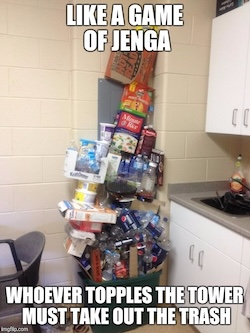

## Generator Expressions
We have seen this before but lets focus and brake it down

In [8]:
# x is a list
# x = [2*b+1 for b in range(2)]
x=[]
for a in range(5):
    x.append(2*a+1)

# y is a generator 
y = (2*b+1 for b in range(5)) 


#not to be confused with
z = tuple(2*c+1 for c in range(5))

In [3]:
print(x)
print(y)
print(z)

[1, 3, 5, 7, 9]
<generator object <genexpr> at 0x107723b90>
(1, 3, 5, 7, 9)


In [4]:
print("The size of x in bites: " + str(x.__sizeof__()))
print("The size of y in bites: " + str(y.__sizeof__()))
print("The size of z in bites: " + str(z.__sizeof__()))

The size of x in bites: 104
The size of y in bites: 192
The size of z in bites: 64


Note that the size of the generator y is static 

In [5]:
print("The size of y before: " + str(y.__sizeof__()))
y = (2*b+1 for b in range(10)) 
print("The size of y after: " + str(y.__sizeof__()))

The size of y before: 192
The size of y after: 192




A generator is an object that you can iterate over like a list

``` python
for student in students
    print(student)
```

A basic generator expression has 3 operators 
```python
('expression' for 'target' in 'sorce')
```



In [ ]:
print(sum(y)) # returns 100
print(sum(y)) # returns 0 
#notice that the value goes from 100 to 0 Why?

100
0


A generator sits idle until is is used. Then after it is consumed it no has a value

## A little bit of ~~monica~~ C in my life


In [1]:
#must use python 3.11

import ctypes #C compatible data types 

In [66]:

x = (2*b+1 for b in range(5))
y = list(range(1, 5))

print("Memory address of x (generator):", hex(id(x)))
print("Memory address of y (list):", hex(id(y)))

Memory address of x (generator): 0x10655a9b0
Memory address of y (list): 0x106034e00


In [67]:
a = ctypes.cast(id(x), ctypes.py_object).value
b = ctypes.cast(id(y), ctypes.py_object).value

print("Memory address of \"a\" (generator):", hex(id(a)))

for _ in range(5):
    print(f"The value of \"a\" (generator) is at Memory address [{next(a)}] after next():", hex(id(a)))


Memory address of "a" (generator): 0x10655a9b0
The value of "a" (generator) is at Memory address [1] after next(): 0x10655a9b0
The value of "a" (generator) is at Memory address [3] after next(): 0x10655a9b0
The value of "a" (generator) is at Memory address [5] after next(): 0x10655a9b0
The value of "a" (generator) is at Memory address [7] after next(): 0x10655a9b0
The value of "a" (generator) is at Memory address [9] after next(): 0x10655a9b0


In [68]:

print("Memory address of b (list):", id(b))
for i in range(len(y)):
    print(f"Memory address of b[{i}] (list element) is at Memory address:", hex(id(b[i])))


Memory address of b (list): 4395847168
Memory address of b[0] (list element) is at Memory address: 0x10380ab50
Memory address of b[1] (list element) is at Memory address: 0x10380ab70
Memory address of b[2] (list element) is at Memory address: 0x10380ab90
Memory address of b[3] (list element) is at Memory address: 0x10380abb0


In [76]:
print(hex(id(b)))
print(hex(id(y)))
print(a)
print(hex(0x10655a9b0)) #<generator object <genexpr> at 0x10655a9b0>

0x106034e00
0x106034e00
<generator object <genexpr> at 0x10655a9b0>
0x10655a9b0


As you can see this could cause errors in your code if you try to resue the generator so it is important if you plan to use it again to save the value as a tuple or a list

# Back to our normal scheduled programming        

# Comprehensions
A variation of a generator but is used to create a list, set or dict object.

This is a basic  list comprehension
```python
('expression' for 'target' in 'source')
#expanded
('(a,b)' for 'target-b' in 'source' for 'target-a' in 'source')

```

## Filtering 

In [12]:
#this will create a list and then filter it
even_squares = [x**2 for x in range(10) if x % 2 == 0]
print(even_squares) 

[0, 4, 16, 36, 64]


In [ ]:
#lets try it with the following 
deck = [(r,s) for s in '♥♦♠♣' for r in range(1,14)] #list
print(deck)

[(1, '♥'), (2, '♥'), (3, '♥'), (4, '♥'), (5, '♥'), (6, '♥'), (7, '♥'), (8, '♥'), (9, '♥'), (10, '♥'), (11, '♥'), (12, '♥'), (13, '♥'), (1, '♦'), (2, '♦'), (3, '♦'), (4, '♦'), (5, '♦'), (6, '♦'), (7, '♦'), (8, '♦'), (9, '♦'), (10, '♦'), (11, '♦'), (12, '♦'), (13, '♦'), (1, '♠'), (2, '♠'), (3, '♠'), (4, '♠'), (5, '♠'), (6, '♠'), (7, '♠'), (8, '♠'), (9, '♠'), (10, '♠'), (11, '♠'), (12, '♠'), (13, '♠'), (1, '♣'), (2, '♣'), (3, '♣'), (4, '♣'), (5, '♣'), (6, '♣'), (7, '♣'), (8, '♣'), (9, '♣'), (10, '♣'), (11, '♣'), (12, '♣'), (13, '♣')]


In [10]:
deck = list((s) for s in '♥♦♠♣' if s =='♥')
deck

['♥']

In [101]:
{x:x**2-x+2 for x in range(1,10)}

{1: 2, 2: 4, 3: 8, 4: 14, 5: 22, 6: 32, 7: 44, 8: 58, 9: 74}

In [ ]:
deck = {(r,s) for s in '♥♦♠♣' for r in range(1,14)}
print(deck)
#

{(9, '♦'), (12, '♣'), (11, '♦'), (9, '♠'), (3, '♣'), (2, '♦'), (13, '♦'), (7, '♥'), (11, '♠'), (6, '♦'), (5, '♣'), (2, '♠'), (13, '♠'), (6, '♠'), (4, '♦'), (9, '♥'), (7, '♣'), (11, '♥'), (4, '♠'), (10, '♦'), (8, '♦'), (2, '♥'), (13, '♥'), (8, '♠'), (6, '♥'), (10, '♠'), (9, '♣'), (11, '♣'), (4, '♥'), (2, '♣'), (13, '♣'), (12, '♦'), (5, '♦'), (3, '♦'), (8, '♥'), (12, '♠'), (6, '♣'), (10, '♥'), (3, '♠'), (5, '♠'), (4, '♣'), (8, '♣'), (7, '♦'), (12, '♥'), (10, '♣'), (3, '♥'), (7, '♠'), (5, '♥')}


### Try this: Quiz found on canvas

Use: 
```
deck = {(r,s) for s in '♥♦♠♣' for r in range(1,14)} 
```
as a starting point use a Comprehension to  create a dict of all the cards. 

should produce a variation of the following output: 
```python
{'1': {'♠', '♣', '♥', '♦'}
 '2': {'♠', '♣', '♥', '♦'},
 '3': {'♠', '♣', '♥', '♦'},
 '4': {'♠', '♣', '♥', '♦'},
 '5': {'♠', '♣', '♥', '♦'},
 '6': {'♠', '♣', '♥', '♦'},
 '7': {'♠', '♣', '♥', '♦'},
 '8': {'♠', '♣', '♥', '♦'},
 '9': {'♠', '♣', '♥', '♦'},
 '10': {'♠', '♣', '♥', '♦'},
 '11': {'♠', '♣', '♥', '♦'},
 '12': {'♠', '♣', '♥', '♦'},
 '13': {'♠', '♣', '♥', '♦'}}



{1: {'♠', '♣', '♥', '♦'},
 2: {'♠', '♣', '♥', '♦'},
 3: {'♠', '♣', '♥', '♦'},
 4: {'♠', '♣', '♥', '♦'},
 5: {'♠', '♣', '♥', '♦'},
 6: {'♠', '♣', '♥', '♦'},
 7: {'♠', '♣', '♥', '♦'},
 8: {'♠', '♣', '♥', '♦'},
 9: {'♠', '♣', '♥', '♦'},
 10: {'♠', '♣', '♥', '♦'},
 11: {'♠', '♣', '♥', '♦'},
 12: {'♠', '♣', '♥', '♦'},
 13: {'♠', '♣', '♥', '♦'}}

# Generator Functions
A generator function is the same as a generator expression just represented as a function. 

A key difference is the yield statement. Yield is used to make the function act like a generator.

In [4]:
def quadraticSequence(arg):
    for x in range(1, arg + 1):
        yield x**2 - x + 2

In [5]:
gen = quadraticSequence(5)
list(quadraticSequence(5))
next(gen)

2

In [8]:
print(next(quadraticSequence(5)))
print(next(next(quadraticSequence(5))))#what do you think happens here

2


TypeError: 'int' object is not an iterator

    You can treat Generator Functions the same as Generator expressions

In [9]:
print(sum(quadraticSequence(5))/5)

10.0


In [ ]:
import time

In [10]:
largeNumber = 100000000 #100,000,000 about 10 seconds
#largeNumber = 300000000 # 300,000,000 about 30 seconds

In [ ]:
import time
def generateSequence(arg):
    for x in range(1,arg+1):
        yield x**2-x+2

timeBefore= time.perf_counter()

for x in range(1,largeNumber+1):
         x**2-x+2
tmp1 = x/largeNumber

timeAfter= time.perf_counter()
timeAfter - timeBefore

8.101746040978469

In [12]:
timeBefore= time.perf_counter()

tmp2= sum(quadraticSequence(largeNumber))/largeNumber

timeAfter= time.perf_counter()

timeAfter - timeBefore

8.021705915918574

In [13]:
#note the follow was ChatGPT's Optimized code

timeBefore = time.perf_counter()

# Calculate the sum directly within the loop
sequence_sum = 0
for x in range(1, largeNumber + 1):
    sequence_sum += x**2 - x + 2

# Calculate the average
tmp3 = sequence_sum / largeNumber

timeAfter = time.perf_counter()

In [ ]:
print("The size of tmp1 in bites: " + str(tmp1.__sizeof__()))
print("The size of tmp2 in bites: " + str(tmp2.__sizeof__()))
print("The size of tmp3 in bites: " + str(tmp3.__sizeof__()))

The size of tmp1 in bites: 24
The size of tmp2 in bites: 24
The size of tmp3 in bites: 24


## iter
    The python iter function is used to return an iterator for the object. 
    The iter() is used to create an object that will iterate one element at a time. 
    The iter() takes two optional arguments as input.

In [ ]:
y = (2*y+1 for y in range(5)) 
print(sum(y))
x = iter(2*x+1 for x in range(5)) 
print(sum(x))

### So why use iter()? 

In [ ]:
def read_line():
    line = input("Enter a line (or press Enter to stop): ")
    return line if line else None

line = read_line()
while line != None:
    print("You entered:", line)
    line = read_line()



In [ ]:
def read_line():
    line = input("Enter a line (or press Enter to stop): ")
    return line if line else None  # Returns None to indicate stop

for line in iter(read_line, None):  # Stops when `read_line()` returns None
    print("You entered:", line)

read_line()

In [ ]:
class Dagger:
    def __init__(self, durability):
        self.durability = durability  # Number of uses before it breaks
        self.damage = 10

    def stab(self):  # Stabbing action
        if self.durability <= 0:
            return None  # Sentinel value (used for iter)
        self.durability -= 1
        if self.durability == 0:
            print("Stab! " + str(self.durability) +" uses left.")
            return None
        return f"Stab! {self.durability} uses left."

dagger = iter(Dagger(3).stab, None)
for d in dagger:
    print(d)
    if d == None:
        break
    print(next(dagger))

Stab! 2 uses left.
Stab! 1 uses left.
Stab! 0 uses left.


OR!

In [ ]:
class Dagger:
    def __init__(self, durability):
        self.durability = durability  # Number of uses before it breaks
        self.damage = 100

    def __del__(self):
        del self.damage

    def stab(self):  # Stabbing action
        if self.durability <= 0:
            print("You are unable to use this")
            return None  # Sentinel value (used for iter)
        self.durability -= 1
        if self.durability == 0:
            return f"Stab! {self.durability} uses left."
        return f"Stab! {self.durability} uses left."

    def use_dagger(self):
        dagger_iter = iter(self.stab, None)
        try:
            print(next(dagger_iter))
        except StopIteration:
            del self.damage
            return None

# Create a Dagger object and use it
dagger = Dagger(3)
print(dagger.damage)
dagger.use_dagger()
dagger.use_dagger()
dagger.use_dagger()
dagger.use_dagger()
print(dagger.damage)

100
Stab! 2 uses left.
Stab! 1 uses left.
Stab! 0 uses left.
You are unable to use this


AttributeError: 'Dagger' object has no attribute 'damage'

In [ ]:
# here is a use in a class

class Dagger:
    def __init__(self, durability):
        self.durability = durability  # Number of uses before it breaks

    def __iter__(self):  # Makes the dagger an iterable object
        return self

    def __next__(self):  # Defines how next() works
        if self.durability <= 0:
            raise StopIteration("The dagger shatters!")  # The dagger breaks
        self.durability -= 1
        return f"Stab! {self.durability} uses left."

# Create a dagger with 3 durability points
dagger = Dagger(3))  

print(next(dagger))  # "Stab! 2 uses left."
print(next(dagger))  # "Stab! 1 use left."
print(next(dagger))  # "Stab! 0 uses left."
print(next(dagger))  # Raises StopIteration: "The dagger shatters!"


In [ ]:
class DaggerBrokenError(Exception):
    """Custom exception for a broken dagger."""
    pass

class Dagger:
    def __init__(self, durability):
        self.durability = durability  # Number of uses before it breaks
        self.__damage = 100  # Private attribute

    def __del__(self):
        print("Object destroyed")

    def stab(self):  # Stabbing action
        if self.durability <= 0:
            raise DaggerBrokenError("good job you broke it")
        self.durability -= 1
        if self.durability == 0:
            print("no Durability")
            del self.__damage  # Delete the private damage attribute
        return f"Stab! {self.durability} uses left."

    def use_dagger(self):
        dagger_iter = iter(self.stab, None)
        try:
            while True:
                print(next(dagger_iter))
        except StopIteration:
            print("Iteration has stopped.")

    def get_damage(self):
        if self.durability <= 0:
            raise DaggerBrokenError("The dagger is broken and can no longer be used.")
        return self.__damage

# Create a Dagger object and use it
dagger = Dagger(3)
print(dagger.get_damage())  # Access the private damage attribute through a method

try:
    dagger.use_dagger()
    print(dagger.get_damage())  # This will raise an exception because the attribute is deleted
except AttributeError:
    print("The damage attribute no longer exists.")
except DaggerBrokenError as e:
    print(e)